In [1]:
#import libraries
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(phyloseq)
library(dplyr)
library(microbiome)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




In [2]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [3]:
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")


In [4]:
# Read in the 16S qza files 
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
# Extract the count data from list
ASVtable_16S <- ASVtable_16S$data 
#Extract taxa 
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"))  %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV)  
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#read metadata
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [5]:
sample_info_tab_16S$SCTLD_status = factor(sample_info_tab_16S$SCTLD_status,
                                  c("Vulnerable", "Endemic", "Epidemic")) 

In [6]:
sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

In [7]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

In [8]:
ps.coral =subset_samples(physeq_16S, sample_type %in% sub_samples2 & Alias!="AcroporaDisease"
                       )

ps.coral

ps.coral_TL_reef =subset_samples(ps.coral, Biome=="Field")
ps.coral_TL_reef

ps.coral_TL_reef =subset_samples(ps.coral_TL_reef, tissue_type=="AH" )
ps.coral_TL_reef


ps.coral_TL_reef = filter_taxa(ps.coral_TL_reef, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps.coral_TL_reef

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 898 samples ]
sample_data() Sample Data:       [ 898 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 345 samples ]
sample_data() Sample Data:       [ 345 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41504 taxa and 345 samples ]
sample_data() Sample Data:       [ 345 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 41504 taxa by 10 taxonomic ranks ]

## Supplemental Figure 1

In [9]:
ps_rare <- phyloseq::rarefy_even_depth(ps.coral_TL_reef, rngseed = 123, replace = TRUE, sample.size=1000)           

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

11 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


CNAT1c-719-9CNAT1c-917-253376395427

...

26483OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [10]:
ps_rare
head(phyloseq::sample_sums(ps_rare))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15021 taxa and 334 samples ]
sample_data() Sample Data:       [ 334 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 15021 taxa by 10 taxonomic ranks ]

102tiss_S3 75Ltiss_S37 234tiss_S36 79Ltiss_S42   97tiss_S1 105tiss_S25 
       1000        1000        1000        1000        1000        1000

In [11]:
div <- data.frame(
   "Shannon" = phyloseq::estimate_richness(ps_rare, measures = "Shannon"),
    "Reef" = phyloseq::sample_data(ps_rare)$reef_name,
    "Disease" = phyloseq::sample_data(ps_rare)$tissue_type,
    "species_code" = phyloseq::sample_data(ps_rare)$species_code,
    "Location" = phyloseq::sample_data(ps_rare)$Location,
  #"PD" = picante::pd(samp = data.frame(t(data.frame(phyloseq::otu_table(ps_rare)))), tree = phyloseq::phy_tree(ps_rare))[, 1],
  "Zone" = phyloseq::sample_data(ps_rare)$SCTLD_status)
head(div)

,Shannon,Reef,Disease,species_code,Location,Zone
,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>
102tiss_S3,1.933008,BuckIsland,AH,MMEA,VirginIslands,Epidemic
75Ltiss_S37,3.966500,BuckIsland,AH,MCAV,VirginIslands,Epidemic
234tiss_S36,3.542560,BlackPoint,AH,MCAV,VirginIslands,Epidemic
79Ltiss_S42,3.768613,BuckIsland,AH,MCAV,VirginIslands,Epidemic
97tiss_S1,3.898311,BuckIsland,AH,MCAV,VirginIslands,Epidemic
105tiss_S25,2.062113,BuckIsland,AH,MMEA,VirginIslands,Epidemic


In [12]:
div_new =as.data.frame(div) %>%
  gather(key = metric, value = value, c("Shannon")) %>%
  mutate(metric = factor(metric, levels = c("Shannon")))

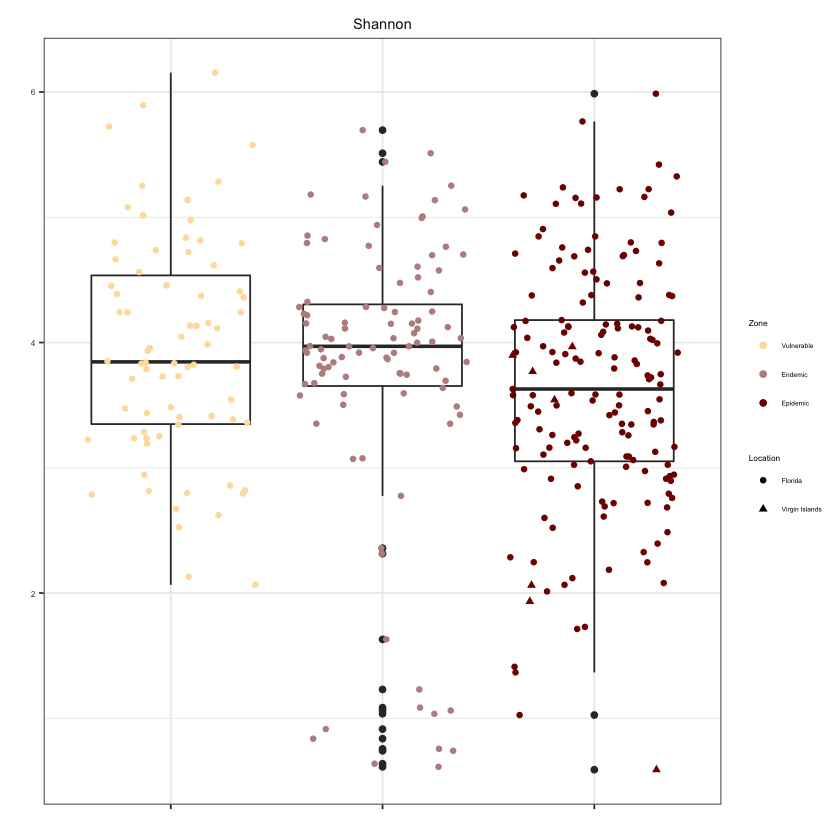

In [13]:
fig_alpha=  
 div_new %>%
filter(metric=="Shannon") %>%
ggplot(aes(x = Zone, y = value)) +
  geom_boxplot() +
  geom_jitter(aes(color = Zone, shape=Location)) +
scale_shape_manual(values=c(16, 17),
                  label=c(VirginIslands="Virgin Islands")) +
theme_bw() +

scale_color_manual(values=c(
 "#FFDEAD","#BC8F8F", "#800000"
)) +
  labs(x = "", y = "")  +
  facet_wrap(.~ metric, scales = "free") +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.text.x = element_blank()) +
theme(axis.text.y = element_text(size =5)) +
theme(strip.background = element_blank()) 
fig_alpha

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig1.pdf",
     width = 4, height = 4, units = "in", dpi=300)

## Supplemental Figure 2

In [14]:
alpha= read.table("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/alpha_biome.txt",
                 
                 )

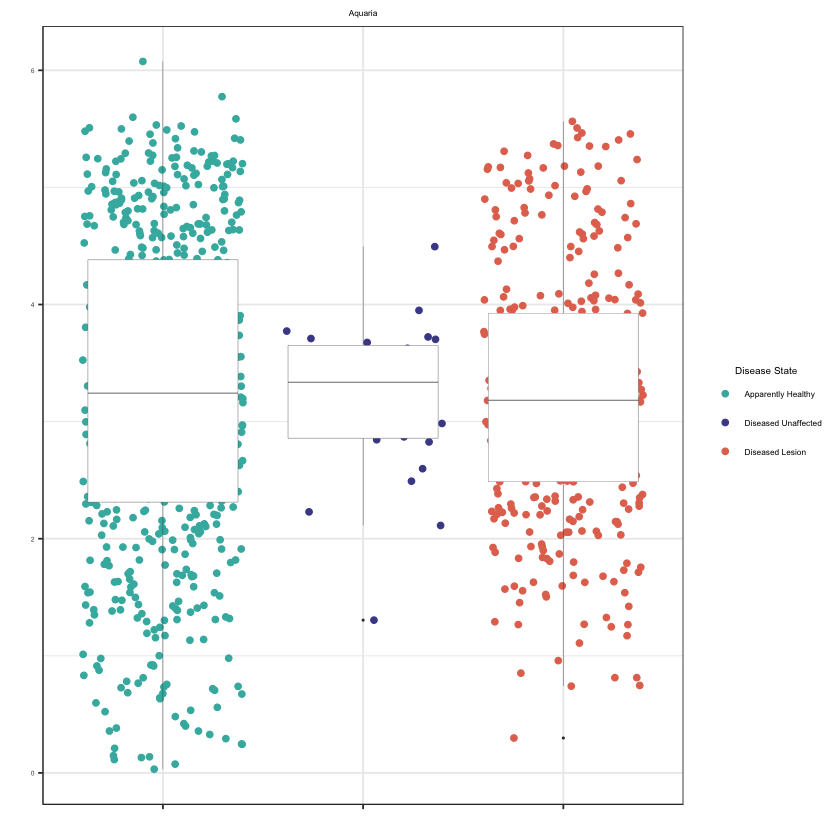

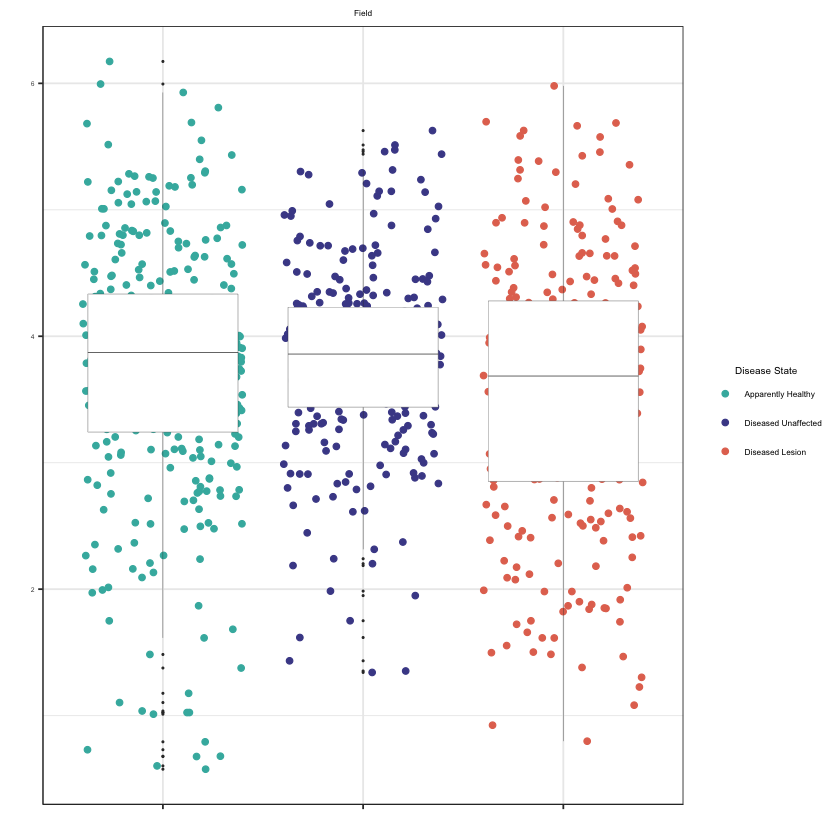

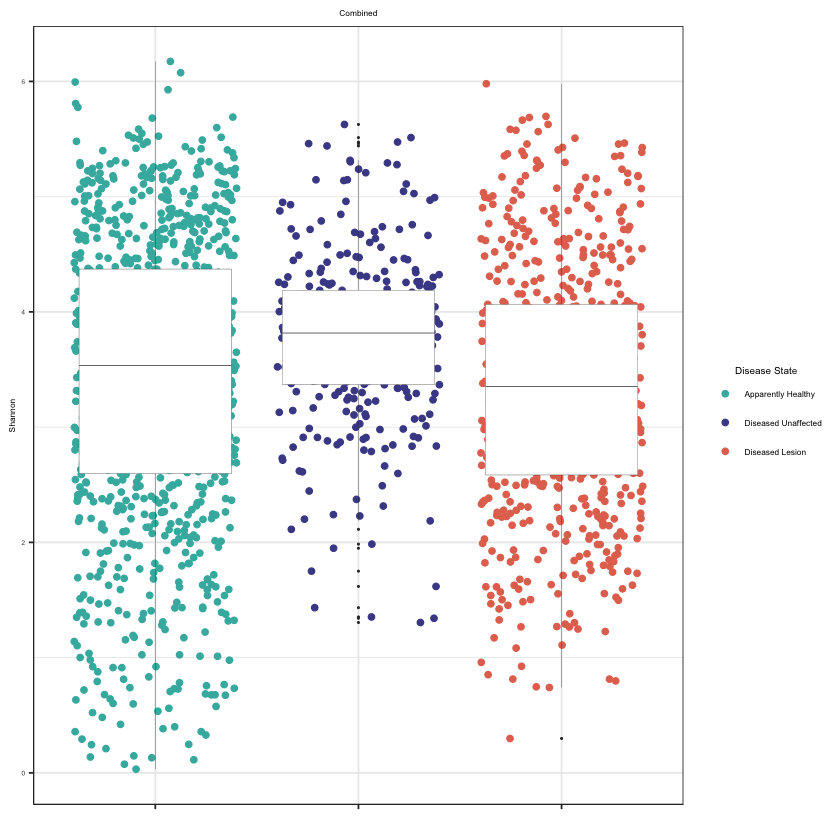

In [15]:
alpha$Disease = factor(alpha$Disease,
                                  c("AH", "DU", "DL")) 

fig_alpha_meso=  
alpha %>%
filter(Biome=="Aquaria") %>%
#filter(metric=="Shannon") %>%
ggplot(aes(x = Disease, y = Shannon)) +

  geom_jitter(aes(color = Disease)) +
  geom_boxplot(size=.1, outlier.size = .2) +
theme_bw() +

scale_color_manual(values=c("#40B5AD", "#4a4a96", "#E3735E"),
                  labels=c(AH="Apparently Healthy",
                            DU="Diseased Unaffected", 
                            DL="Diseased Lesion")) +
  #facet_wrap(., scales = "free") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.text.x = element_blank()) +
theme(axis.text.y = element_text(size =4)) +
labs(x = "", y = "", title="Aquaria") +
theme(plot.title = element_text(hjust = 0.5, vjust=1, size=5),
axis.line.y = element_line(size = .2), axis.line.x = element_line(size = .2)) +
guides(color = guide_legend(title.position = "top", 
                              title.hjust = 0.5, title="Disease State")) 
fig_alpha_meso


fig_alpha_field=  
alpha %>%
filter(Biome=="Field") %>%
#filter(metric=="Shannon") %>%
ggplot(aes(x = Disease, y = Shannon)) +
  geom_jitter(aes(color = Disease)) +
  geom_boxplot(size=.1, outlier.size = .2) +
theme_bw() +
labs(x = "", y="", title="Field") +
theme(plot.title = element_text(hjust = 0.5, vjust=1, size=5),
axis.line.y = element_line(size = .2), axis.line.x = element_line(size = .2)) +

scale_color_manual(values=c("#40B5AD", "#4a4a96", "#E3735E"),
                  labels=c(AH="Apparently Healthy",
                            DU="Diseased Unaffected", 
                            DL="Diseased Lesion")) +
  #facet_wrap(., scales = "free") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.text.x = element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(title.position = "top", 
                              title.hjust = 0.5, title="Disease State")) 

fig_alpha_field


fig_alpha=  
alpha %>%
ggplot(aes(x = Disease, y = Shannon)) +

  geom_jitter(aes(color = Disease)) +
  geom_boxplot(size=.1, outlier.size = .2) +
theme_bw() +

scale_color_manual(values=c("#40B5AD", "#4a4a96", "#E3735E"),
                  labels=c(AH="Apparently Healthy",
                            DU="Diseased Unaffected", 
                            DL="Diseased Lesion")) +
labs(x = "", y = "Shannon" , title="Combined") +
theme(plot.title = element_text(hjust = 0.5, vjust=1, size=5),
     axis.line.y = element_line(size = .2), axis.line.x = element_line(size = .2)) +

  #facet_wrap(., scales = "free") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
guides(color = guide_legend(title.position = "top", 
                              title.hjust = 0.5, title="Disease State")) +

theme(axis.text.x = element_blank()) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.title.y = element_text(size =5)) 
fig_alpha

In [16]:
ps.coral = filter_taxa(ps.coral, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 204 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 204 taxa by 10 taxonomic ranks ]

In [17]:
ps.coral_RA=  ps.coral %>%
transform('compositional') 
TopNOTUs=names(sort(taxa_sums(ps.coral_RA), TRUE)[1:20]) 
ps.coral_RA=prune_taxa(TopNOTUs, ps.coral_RA)
ps.coral_RA

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 10 taxonomic ranks ]

In [18]:
sum_ps.coral   <- ps.coral_RA  %>%
  tax_glom(taxrank = "Order") %>%
  #transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

`mutate_if()` ignored the following grouping variables:
• Column `tissue_type`
`mutate_if()` ignored the following grouping variables:
• Column `tissue_type`


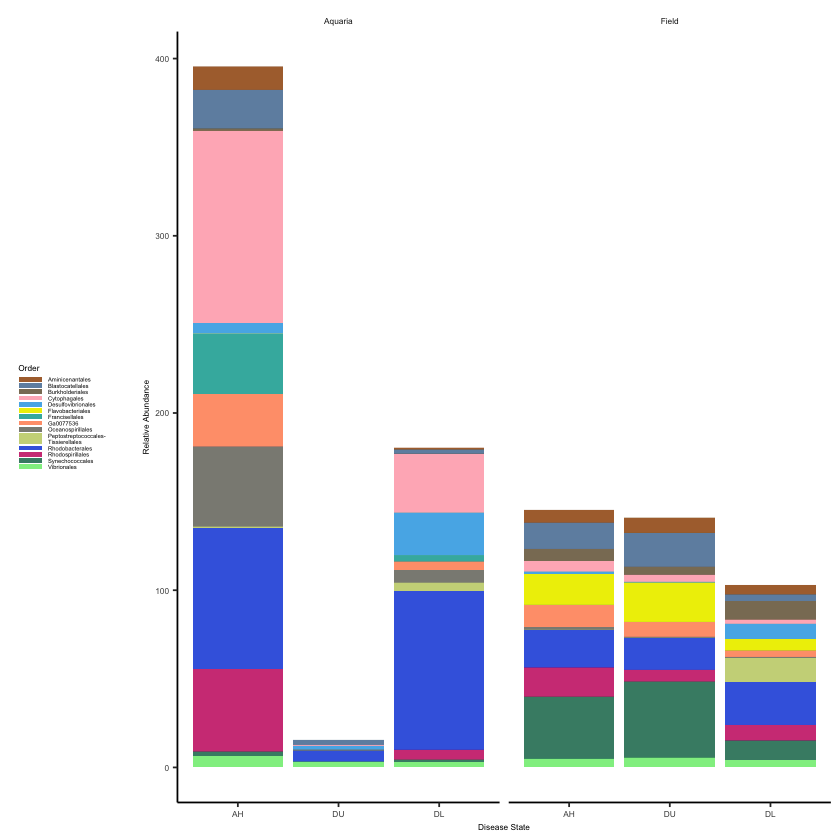

In [19]:
sum_ps.coral$tissue_type <- factor(sum_ps.coral$tissue_type, 
    levels = c("AH","DU", "DL"))
ra_tissue = sum_ps.coral %>%
group_by(tissue_type) %>%
#filter(Abundance>0.5 ) %>%
#filter(Abundance!="NaN" ) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\n Tissierellales")  %>%
ggplot( 
       aes(x =tissue_type, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="stack") +
facet_grid(tissue_type~., scales = "free") +
theme_classic() +
scale_fill_manual(values=c(
 "#AD6F3B",
"#6F8FAF",                        
 "#8A7C64",
 "lightpink",
 "#56B4E9",
"yellow2",
 "#40B5AD",
"lightsalmon",
 "ivory4",
"#CBD588",
 "royalblue",
"#D14285",
"aquamarine4",
"lightgreen",
"#5F7FC7",
 "#652926")) +
guides(fill = guide_legend(keywidth = 1, , keyheight =.25, ncol=1)) +
#theme(axis.text.x = element_text(angle = 20, hjust = 1)) +
ylab("Relative Abundance") +
xlab("Disease State") +
scale_x_discrete(labels=c("Mucus" = "Mucus", "TissueSlurry" = " Tissue Slurry",
                              "TissueSlurry_Skeleton" = "Tissue Slurry Skeleton")) +
theme(legend.text =element_text(size=3.5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(strip.text.x = element_text(size =5),
strip.background = element_blank()) +
theme(legend.position = "left") +
facet_grid(.~Biome, scale = "free")
ra_tissue

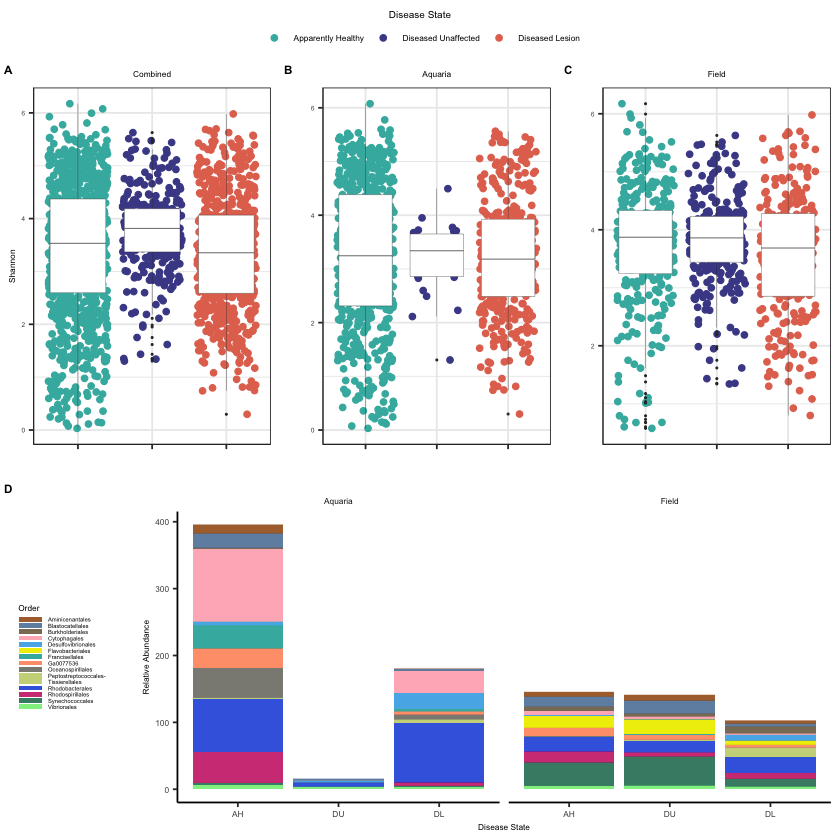

In [20]:

top = ggpubr::ggarrange(fig_alpha, fig_alpha_meso, fig_alpha_field, labels = c("A", "B" ,"C"),
                  font.label = list(size = 7, color = "black"), nrow=1,
                       common.legend =TRUE)
bottom = ggpubr::ggarrange(ra_tissue, labels = c("D"),
                  font.label = list(size = 7, color = "black"), nrow=1)
ggpubr::ggarrange(top, bottom, nrow =2, heights = c(0.40, 0.3, 0.3))

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig3.pdf",
     width = 4, height = 4.5, units = "in", dpi=300)

## Supplemental Figure 3

In [21]:
library(PCAtools)

Loading required package: ggrepel


Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot




In [22]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

In [23]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")
ps.coral =subset_samples(physeq_16S, sample_type %in% sub_samples)

ps.coral = filter_taxa(ps.coral, function(x) sum(x > 5) > (0.20*length(x)), TRUE)
ps.coral

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 227 taxa and 2362 samples ]
sample_data() Sample Data:       [ 2362 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 227 taxa by 10 taxonomic ranks ]

In [24]:
ps.coral_clr <- microbiome::transform(ps.coral, 'clr')
ps.coral_clr.ord <- ordinate(ps.coral_clr, "RDA", "euclidean")

In [25]:
ps_clr_df=as.data.frame(otu_table(ps.coral_clr))
ps_clr_meta= as(sample_data(ps.coral_clr), "data.frame")
ps_clr_meta_edit = ps_clr_meta %>% 
dplyr::rename("Disease.State" = tissue_type) %>%
dplyr::rename("Sample.Type" = sample_type) %>%
dplyr::rename("Coral.Species" = species_code) %>%
dplyr::rename("Year" = collection_year) %>%
dplyr::rename("Region" = country) %>%
dplyr::rename("Primers" = primer_names)

In [26]:
 p <- PCAtools::pca(ps_clr_df, metadata = ps_clr_meta_edit, removeVar = 0.1)

-- removing the lower 10% of variables based on variance



In [27]:
pdf("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig2.pdf")

 eigencorplot(p,
    metavars = c("Study", "Primers", "Biome", "Coral.Species", 
                 "Disease.State", "Sample.Type", "Year"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')
    #signifSymbols = c( '***', '**', '*', ''),
    #signifCutpoints = c( 0, 0.01, 0.05, 1))

dev.off()

Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Study is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Primers is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Biome is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Coral.Species is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Study", "Primers", "Biome", "Coral.Species", :
“Disease.State is not numeric - please check the source data as non-numeric variables 

Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = cor

pdf 
  2

## Suplemental 4A

In [28]:
ord_NoMCOF<-read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_DEICODE/ordination_NoMCOF.qza")


Joining, by = "SampleID"


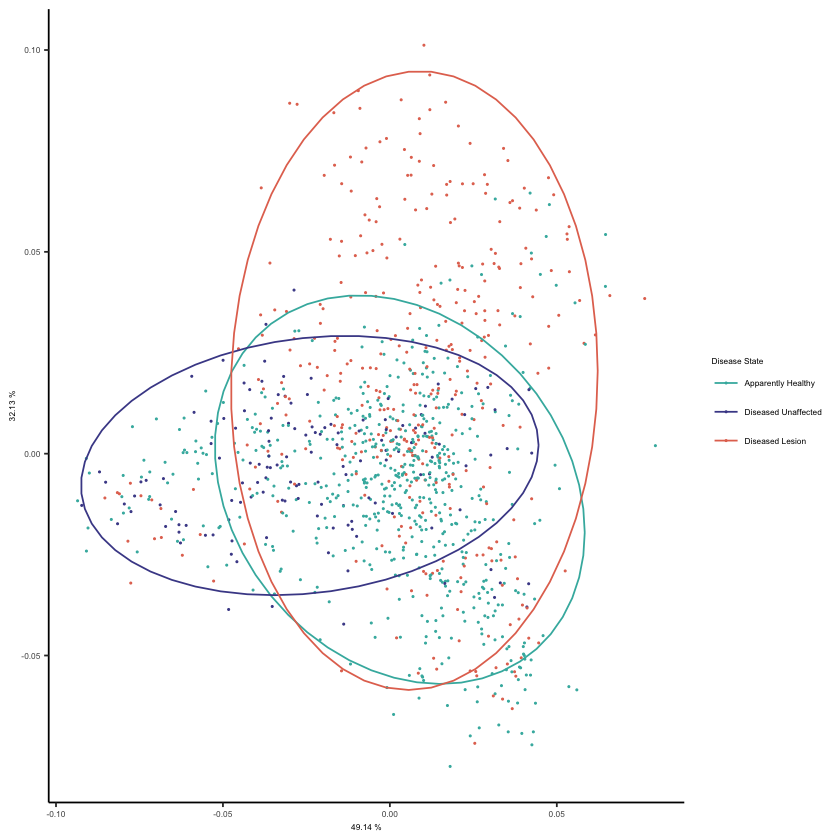

In [29]:
sample_info_tab_16S$tissue_type <- factor(sample_info_tab_16S$tissue_type, 
    levels = c("AH", "DU", "DL"))

fig_NoMCOF= ord_NoMCOF$data$Vectors %>%
left_join(sample_info_tab_16S)  %>%
ggplot(aes(x=PC1, y=PC2, color=tissue_type),  inherit.aes = FALSE ) +
geom_point(size=.2) +
stat_ellipse() +
theme_classic() +
xlab(paste(round(100*ord_NoMCOF$data$ProportionExplained[1],2),"%")) +
  ylab(paste(round(100*ord_NoMCOF$data$ProportionExplained[2],2),"%")) +
scale_color_manual(values=c("#40B5AD", "#4a4a96", "#E3735E"),
                  labels=c(AH="Apparently Healthy",
                            DU="Diseased Unaffected", 
                            DL="Diseased Lesion")) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(strip.text.x = element_text(size =5)) +
theme(strip.text.x = element_text(size =5),
strip.background = element_blank()) +
labs(color="Disease State") 
#theme(
 #    axis.line.y = element_line(size = .2), axis.line.x = element_line(size = .2)) +
#facet_grid(.~Biome)

fig_NoMCOF


ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig4A.pdf",
     width = 4, height = 4, units = "in", dpi=300)


## Supplemental Figure 5 & 6

In [30]:
bind_sigs_DL= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/Supplemental_Table5.csv",
        header = T, row.names = 1)  %>%
filter(tissue_typeDL >0) %>%
distinct(Feature.ID, .keep_all = TRUE)
bind_sigs_DL

bind_sigs_DL
bind_sigs_DU = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/Supplemental_Table4.csv",
        header = T, row.names = 1)  %>%
filter(tissue_typeDU >0) %>%
distinct(Feature.ID, .keep_all = TRUE)


Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE,Tissue Slurry
7df259fe05818b722e6f40845a657dc8,4.597978,0.1912251,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_ g__Aliiroseovarius,f__Rhodobacteraceae,g__Aliiroseovarius,NA,0.6666667,ASV_72448,TRUE,Tissue Slurry
c6b98c58f5a8f184cc1b130f66f944ab,6.605426,0.1709424,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,NA,0.7500000,ASV_114300,TRUE,Tissue Slurry
0583e9fb260de4b316e4074bbe4d8870,7.295088,0.1955000,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_NA,f__Rhodobacteraceae,NA,NA,1.0000000,ASV_3285,TRUE,Tissue Slurry
1696d7941bdae3ff494f13fc3f318a57,10.081449,0.2072436,DL,d__Bacteria,p__Desulfobacterota,c__Desulfovibrionia,o__Desulfovibrionales,o__Desulfovibrionales_ f__Desulfovibrionaceae_ g__Halodesulfovibrio,f__Desulfovibrionaceae,g__Halodesulfovibrio,s__Halodesulfovibrio_aestuarii,0.6666667,ASV_13041,TRUE,Tissue Slurry
f0bde56752e14fbc1bbfc4a268625629,3.873695,0.1607968,DL,d__Bacteria,p__Bdellovibrionota,c__Oligoflexia,o__Oligoflexales,o__Oligoflexales_ f__Oligoflexales_ g__Pseudobacteriovorax,f__Oligoflexales,g__Pseudobacteriovorax,s__uncultured_delta,0.6666667,ASV_138492,TRUE,Tissue Slurry
429264bc3cd49d9c544f286870123eaa,6.853699,0.1660693,DL,d__Bacteria,p__Campilobacterota,c__Campylobacteria,o__Campylobacterales,o__Campylobacterales_ f__Arcobacteraceae_ g__Halarcobacter,f__Arcobacteraceae,g__Halarcobacter,s__uncultured_bacterium,0.6666667,ASV_38201,TRUE,Tissue Slurry
5ccf756aaef284913d9eb9762dc81693,8.783035,0.1689900,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,o__Verrucomicrobiales_ f__Rubritaleaceae_ g__Rubritalea,f__Rubritaleaceae,g__Rubritalea,NA,1.0000000,ASV_53282,TRUE,Tissue Slurry
e7cb2ee39636890081f5bfd5ce1a7be7,8.957692,0.1726893,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,o__Clostridiales_ f__Clostridiaceae_ g__Oceanirhabdus,f__Clostridiaceae,g__Oceanirhabdus,s__uncultured_bacterium,0.6666667,ASV_133434,TRUE,Tissue Slurry


Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE,Tissue Slurry
7df259fe05818b722e6f40845a657dc8,4.597978,0.1912251,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_ g__Aliiroseovarius,f__Rhodobacteraceae,g__Aliiroseovarius,NA,0.6666667,ASV_72448,TRUE,Tissue Slurry
c6b98c58f5a8f184cc1b130f66f944ab,6.605426,0.1709424,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,NA,0.7500000,ASV_114300,TRUE,Tissue Slurry
0583e9fb260de4b316e4074bbe4d8870,7.295088,0.1955000,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_NA,f__Rhodobacteraceae,NA,NA,1.0000000,ASV_3285,TRUE,Tissue Slurry
1696d7941bdae3ff494f13fc3f318a57,10.081449,0.2072436,DL,d__Bacteria,p__Desulfobacterota,c__Desulfovibrionia,o__Desulfovibrionales,o__Desulfovibrionales_ f__Desulfovibrionaceae_ g__Halodesulfovibrio,f__Desulfovibrionaceae,g__Halodesulfovibrio,s__Halodesulfovibrio_aestuarii,0.6666667,ASV_13041,TRUE,Tissue Slurry
f0bde56752e14fbc1bbfc4a268625629,3.873695,0.1607968,DL,d__Bacteria,p__Bdellovibrionota,c__Oligoflexia,o__Oligoflexales,o__Oligoflexales_ f__Oligoflexales_ g__Pseudobacteriovorax,f__Oligoflexales,g__Pseudobacteriovorax,s__uncultured_delta,0.6666667,ASV_138492,TRUE,Tissue Slurry
429264bc3cd49d9c544f286870123eaa,6.853699,0.1660693,DL,d__Bacteria,p__Campilobacterota,c__Campylobacteria,o__Campylobacterales,o__Campylobacterales_ f__Arcobacteraceae_ g__Halarcobacter,f__Arcobacteraceae,g__Halarcobacter,s__uncultured_bacterium,0.6666667,ASV_38201,TRUE,Tissue Slurry
5ccf756aaef284913d9eb9762dc81693,8.783035,0.1689900,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,o__Verrucomicrobiales_ f__Rubritaleaceae_ g__Rubritalea,f__Rubritaleaceae,g__Rubritalea,NA,1.0000000,ASV_53282,TRUE,Tissue Slurry
e7cb2ee39636890081f5bfd5ce1a7be7,8.957692,0.1726893,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,o__Clostridiales_ f__Clostridiaceae_ g__Oceanirhabdus,f__Clostridiaceae,g__Oceanirhabdus,s__uncultured_bacterium,0.6666667,ASV_133434,TRUE,Tissue Slurry


In [31]:
ps_sigs_taxa_DL=phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(bind_sigs_DL) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
ps_sigs_taxa_DL
ps_sigs_taxa_DU=phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(bind_sigs_DU) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
ps_sigs_taxa_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 49 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 49 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 31 taxa by 15 taxonomic ranks ]

In [32]:
#otu_table(ps_sigs_taxa_DU)[otu_table(ps_sigs_taxa_DU) > 0] <- 1

In [33]:
sigs_taxa_DL = ps_sigs_taxa_DL %>%
microbiome::transform("compositional") %>%
psmelt()

sigs_taxa_DU = ps_sigs_taxa_DU %>%
microbiome::transform("compositional") %>%
psmelt()

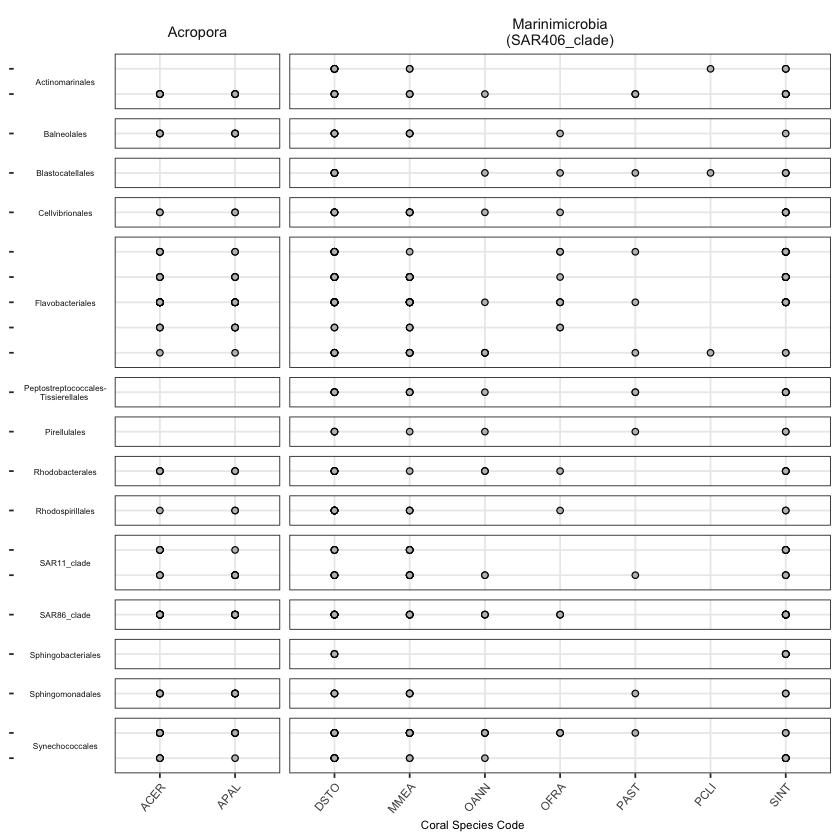

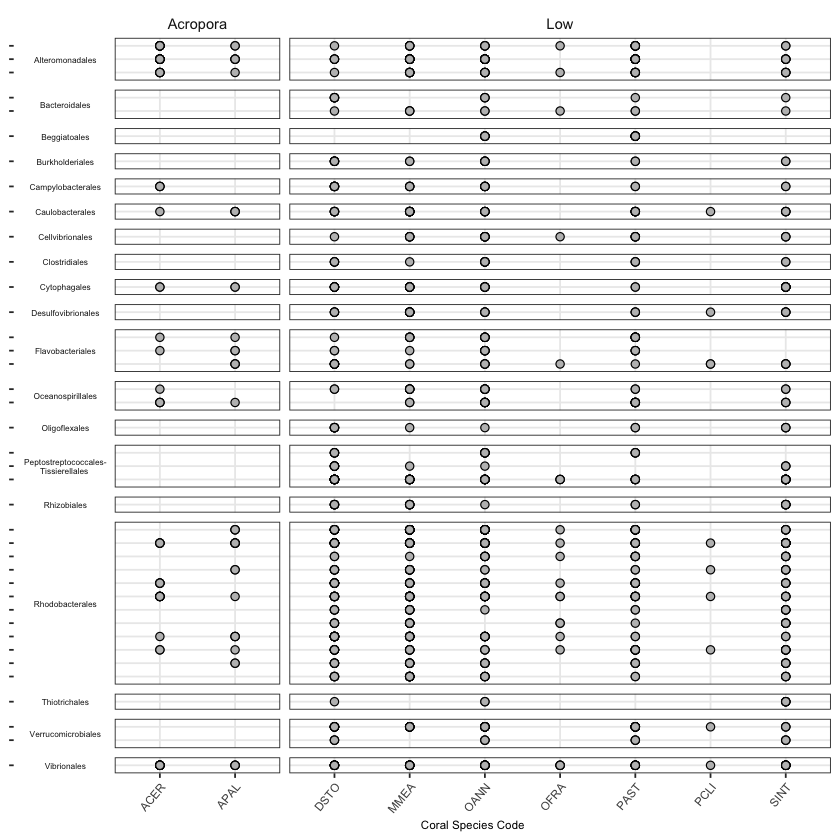

In [41]:
species_PA_DU = sigs_taxa_DU %>%
filter(Order!="NA") %>%
filter(Abundance !=0) %>% 
filter(Species_counts!="High") %>%
filter(sample_type==sub_samples) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%


mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Low", 
                replacement = "Marinimicrobia\n(SAR406_clade)")  %>%

ggplot(
           aes(x = species_code, y = Genus)
              ) + 
 
geom_point(pch=21, colour="black", size=1.5,  fill='grey') +
  theme_bw()  +


labs(y = "Genus", x = "Coral Species Code") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =7)) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
facet_grid(Order~Species_counts, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
theme(strip.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(angle = 50,hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 
species_PA_DU


species_PA_DL= sigs_taxa_DL %>%
filter(Order!="NA") %>%
filter(Species_counts!="High") %>%
filter(Abundance !=0) %>%
filter(sample_type==sub_samples) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Marinimicrobia_(SAR406_clade)", 
                replacement = "Marinimicrobia\n(SAR406_clade)")  %>%

ggplot(
           aes(x = species_code, y = Genus)
              ) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(pch=21, colour="black", size=2,  fill='grey') +
  theme_bw()  +

  
scale_fill_manual(values=c("#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
labs(y = "Genus", x = "Coral Species Code") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_text(size =6)) +
theme(axis.text.x = element_text(size =7)) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
facet_grid(Order~Species_counts, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
theme(strip.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 

species_PA_DL


Warning message in sample_type == sub_samples:
“longer object length is not a multiple of shorter object length”
Warning message in sample_type == sub_samples:
“longer object length is not a multiple of shorter object length”


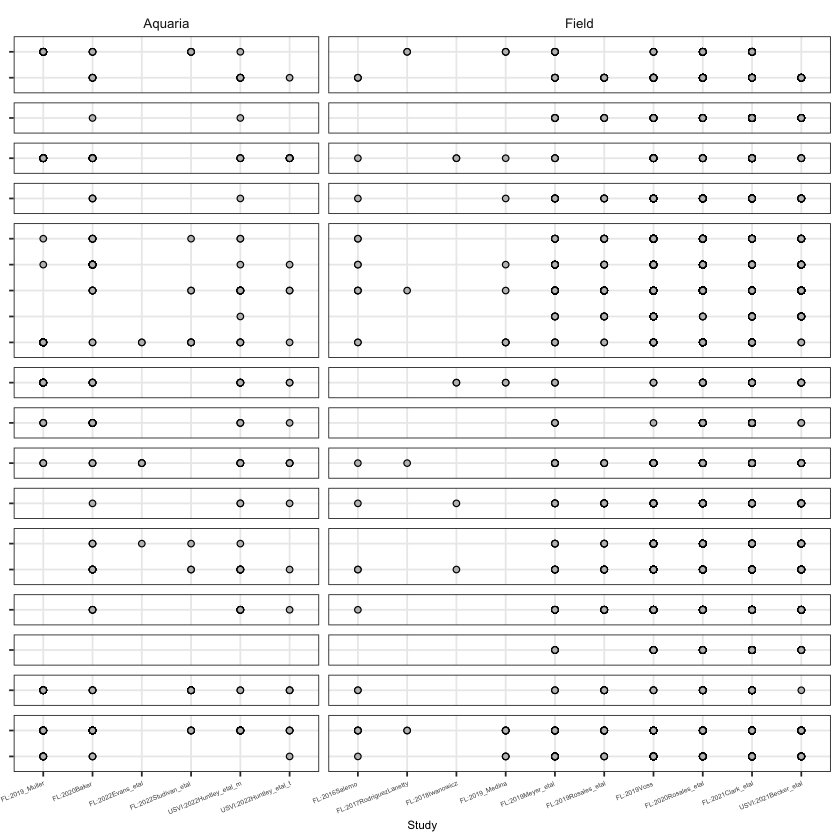

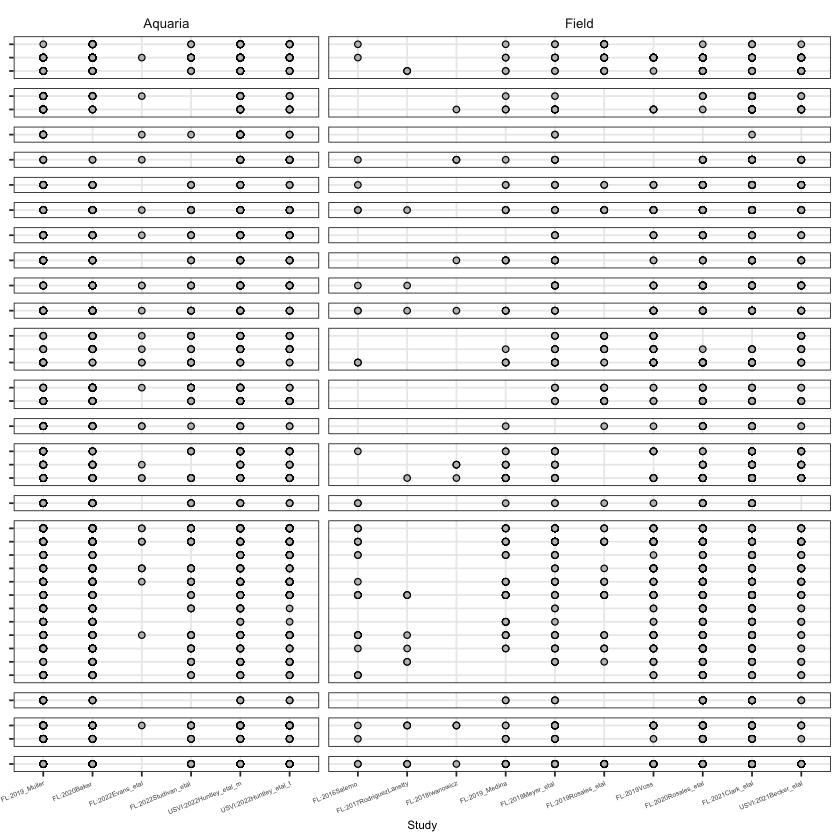

In [35]:
study_PA_DU= sigs_taxa_DU %>%
filter(Order!="NA") %>%
filter(Abundance !=0) %>%
filter(sample_type==sub_samples) %>%

ggplot(
           aes(x = Study, y = Genus)
              ) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 

geom_point(pch=21, colour="black" , fill='grey') +
  theme_bw()  +

labs(y = "Genus", x = "Study") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
#theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =4)) +
#theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~Biome, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
#theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +
theme(axis.text.x = element_text(angle = 22, hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
theme(strip.text.x = element_text(size=8)) 

study_PA_DU






study_PA_DL= sigs_taxa_DL %>%
filter(Order!="NA") %>%
filter(Abundance !=0) %>%
filter(sample_type==sub_samples) %>%

ggplot(
           aes(x = Study, y = Genus)
              ) + 

 
geom_point(pch=21, colour="black", fill='grey') +
  theme_bw()  +
labs(y = "Genus", x = "Study") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
#theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =4)) +
#theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~Biome, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
#theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +
theme(axis.text.x = element_text(angle = 22, hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
theme(strip.text.x = element_text(size=8)) 

study_PA_DL


In [ ]:
ggpubr::ggarrange(species_PA_DU, study_PA_DU, labels = c("A", "B"), nrow=1,
                  font.label = list(size = 6, color = "black"), widths = c(1.5, 1.2))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig5.pdf",
     width = 6, height = 6, units = "in", dpi=300)

In [ ]:
ggpubr::ggarrange(species_PA_DL, study_PA_DL, labels = c("A", "B"), nrow=1,
                  font.label = list(size = 6, color = "black"), widths = c(1.5, 1.2))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig6.pdf",
     width = 6, height = 6, units = "in", dpi=300)

## Supplemental 8

In [36]:
# Read Maslin results from MetaCyc
sig =read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_picrust/output_Maslin/significant_results.txt",
  check.names = FALSE,
                     
                        header = T, sep= "\t")

head(sig, n=1)

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval,Pathway
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,CENTFERM.PWY,tissue_type,DL,0.5673937,0.04583631,1935,1833,6.38e-34,8.52e-32,CENTFERM.PWY


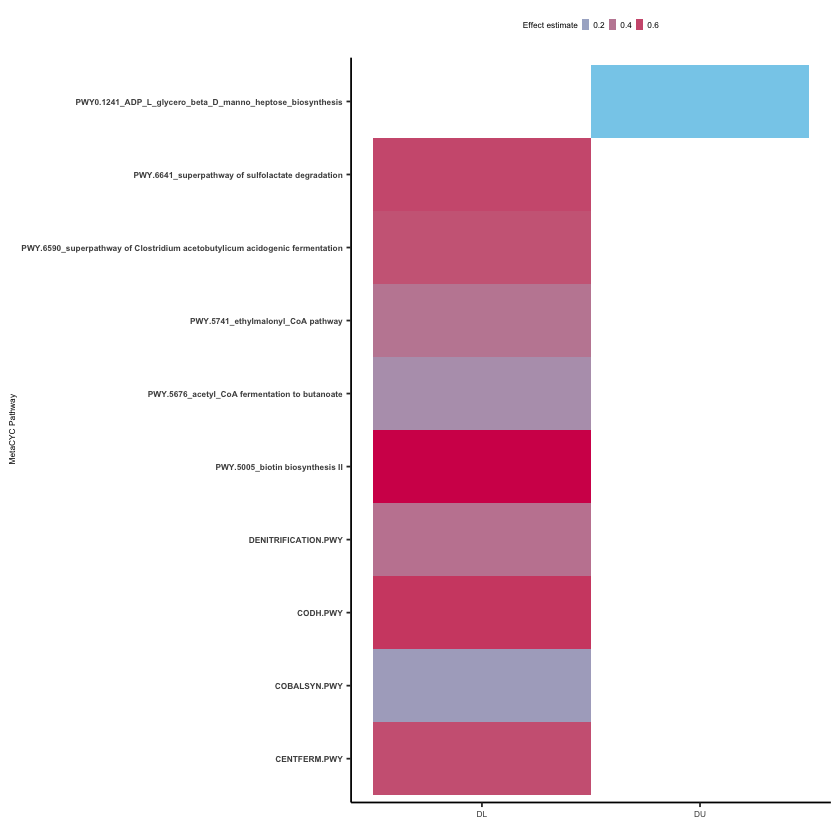

In [37]:
 fig_sig = sig %>%
filter(Pathway!="NA") %>% 
ggplot( 
    aes(x = value, y = Pathway , fill = coef)) + 

theme_classic() +
scale_fill_continuous(guide = guide_legend(keywidth = 0.30, keyheight = 0.50), low = "skyblue",
  high = "#D41159",

name = "Effect estimate") +
theme(axis.title.x = element_text(size = 5),
      axis.title.y = element_text(size = 5),
      axis.text.y = element_text(size =5, face="bold"),
      axis.text.x = element_text(size =5)) +
theme(legend.text =element_text(size=5),
      legend.title = element_text(size=5),
      legend.position="top") +
xlab("") +
ylab(" MetaCYC Pathway") +
geom_tile() 
fig_sig


In [38]:
# Read Maslin results from KEGG
sig_KO =read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/out_picrust/output_Maslin_KO/significant_results.txt",
  check.names = FALSE,
                     
                        header = T, sep= "\t")
head(sig_KO, n=1)

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval,Pathway
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,K00043,tissue_type,DU,0.2476991,0.08001763,1935,1500,0.001992635,0.005554112,K00043_4_hydroxybutyrate_dehydrogenase


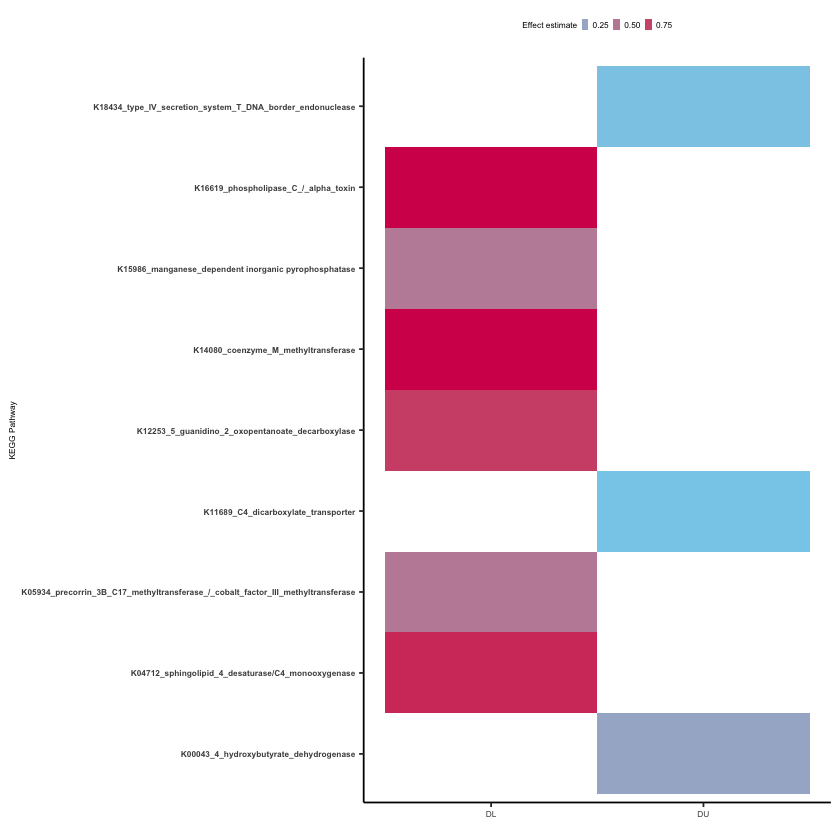

In [39]:
fig_sig_KO = sig_KO %>%

filter(Pathway!="NA") %>% 
ggplot( 
    aes(x = value, y = Pathway , fill = coef)) + 
    geom_tile() +

theme_classic() +
scale_fill_continuous(guide = guide_legend(keywidth = 0.30, keyheight = 0.50), low = "skyblue",
  high = "#D41159",

name = "Effect estimate") +

theme(axis.title.x = element_text(size = 5),
      axis.title.y = element_text(size = 5),
      axis.text.y = element_text(size =5, face="bold"),
      axis.text.x = element_text(size =5)) +
theme(legend.text =element_text(size=5),
      legend.title = element_text(size=5),
      legend.position="top") +
labs(x="", y="KEGG Pathway")
fig_sig_KO


In [ ]:
ggpubr::ggarrange(fig_sig_KO ,fig_sig, labels = c("A", "B"), nrow=1, common.legend = TRUE,
                  font.label = list(size = 7, color = "black"), widths = c(1, 1), align='hv')
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/SupplementalFig8.pdf",
     width = 6.8, height = 4, units = "in", dpi=300)